# Modelo modeloIA1

El presente modelo ha sido generado por la herramienta IACT para el caso: caso1

## 1. Carga de librerias y funciones utilitarias
Se importan las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics as skm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.svm import SVR

Imports para red neuronal

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras import regularizers

Funciones utilitarias

In [3]:
def dibuja_linea (datos, titulo, etiqueta_x='medida_x', etiqueta_y='medida_y', leyendas=None):
    '''
       Función que dibuja una serie de datos
       Parámetros:
         - datos: matriz que contiene los vectores a graficar
         - titulo: titulo a presentar en el gráfico
         - etiqueta_x: nombre de la etiqueta en el eje x
         - etiqueta_y: nombre de la etiqueta en el eje y
         - leyendas: lista de nombres para leyendas
    '''
    X=np.linspace(1, len(datos[0]), len(datos[0]), endpoint=True)
    
    fig, ax = pl.subplots()
    
    for cont in range(0,len(datos)):
        if leyendas is not None:
            ax.plot(X, datos[cont],label=leyendas[cont])
        else:
            ax.plot(X, datos[cont])
    ax.set_title(titulo)
    ax.set(xlabel=etiqueta_x, ylabel=etiqueta_y)
    
        
    if leyendas is not None:
        ax.legend()
    pl.show()

def evalua_regresion(y_test, y_pred, imprimir=False):
    '''
        Función que calcula las métricas de calidad mse, rmse y mae
        Parámetros:
          - y_test: datos reales esperados
          - y_pred: datos predichos
          - imprimir: bandera que indica si imprime o no los valores calculados
    '''
    mse = skm.mean_squared_error(y_test, y_pred)
    mae = skm.mean_absolute_error(y_test, y_pred)
    rmse = mse ** 0.5
    if imprimir:
        print('Error cuadrado medio',mse)
        print('Raíz del error cuadrado medio',rmse)
        print('Error absoluto medio',mae)
    return mse, rmse, mae

def evalua (y_test, resultados, algoritmos):
    '''
        Función que calcula las métricas de calidad mse, rmse y mae de
        varios algoritmos. Arma un DataFrame pandas que compara los
        resultados.
        Parámetros:
          - y_test: datos reales esperados
          - resultados: matriz que contiene los vectores de resultados
                        predichos por cada algoritmo
          - algoritmos: nombres de los algoritmos evaluados
    '''
    df = pd.DataFrame({'metrica':['Error Cuadratico Medio (MSE)','Raiz MSE','Error Absoluto Medio (MAE)']})
    for algoritmo,y_pred in zip(algoritmos,resultados):
        df[algoritmo]=evalua_regresion(y_test, y_pred)
    
    df=df.set_index('metrica')
    return df

def evolucion_random_forest(profundidad, n_estimadores, X_train, y_train, X_test, y_test):
    '''
        Función que presenta gráficamente la evolución del mse para
        Fandom Forest en función de su profundidad.
        Parámetros:
          - profundidad:   profundidad máxima de Random Forest.
          - n_estimadores: número de arboles a utilizar
          - X_train:       datos X de entrenamiento.
          - y_train:       datos y de entrenamiento.
          - X_test:        datos X de prueba.
          - y_test:        datos y de prueba.
    '''
    arreglo_mse=np.zeros(profundidad)

    for i in range (profundidad):
        arbol = RandomForestRegressor(max_depth=i+1,random_state=1234,n_estimators=n_estimadores)
        arbol = arbol.fit(X_train,y_train)
        y_pred = arbol.predict(X_test)
        arreglo_mse[i] = skm.mean_squared_error(y_test, y_pred)
    dibuja_linea([arreglo_mse], 'Evolucion RandomForest en profundidad', etiqueta_x='profundidad', etiqueta_y='Error MSE',)

def normalizar_por_mayor(datos):
    '''
       Función que normaliza los valores de una lista dividiéndolos para el valor mayor
       Parámetros:
         - datos: lista de valores a los que se va a normalizar
    '''
    for col in datos.columns:
        max_val=round(datos[col].max()+0.05,1)
        datos[col]=datos[col]/max_val
    print('Se normalizó la columna',col,'dividiendo para',max_val)

## 2. Preparación de datos

Carga de datos desde los archivos cvs

In [4]:
demanda_data = pd.read_csv('../demanda/demanda.csv')
monitoreo_memoria_data = pd.read_csv('../capacidad/monitoreo_memoria.csv')

## 3. Analisis de datos originales

In [5]:
demanda_data.head(5)

,Fecha,nro_registro,nro_actualiza,nro_consulta,nro_elimina
0,2020-08-02 23:39:44,21,0,0,0
1,2020-08-02 23:39:45,4,0,0,0
2,2020-08-02 23:40:13,5,2,0,0
3,2020-08-02 23:40:14,0,3,3,3
4,2020-08-02 23:40:15,5,4,7,7


In [6]:
demanda_data.describe()

,nro_registro,nro_actualiza,nro_consulta,nro_elimina
count,16447.000000,16447.000000,16447.000000,16447.000000
mean,3.525871,1.061105,1.293427,0.628686
std,3.982013,1.590047,1.401124,1.242009
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,0.000000
75%,5.000000,2.000000,2.000000,1.000000
max,47.000000,18.000000,10.000000,12.000000


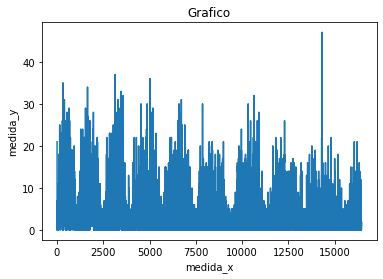

In [7]:
dibuja_linea([demanda_data['nro_registro']], 'Grafico')

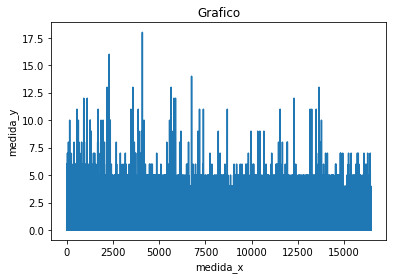

In [8]:
dibuja_linea([demanda_data['nro_actualiza']], 'Grafico')

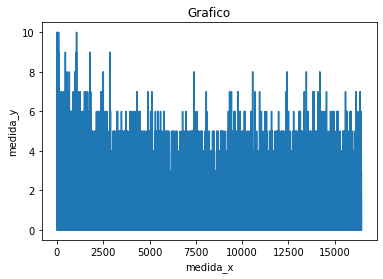

In [9]:
dibuja_linea([demanda_data['nro_consulta']], 'Grafico')

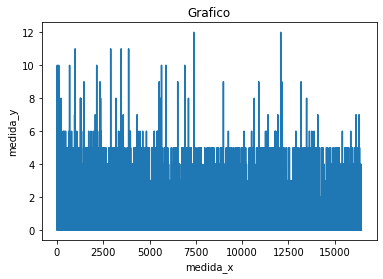

In [10]:
dibuja_linea([demanda_data['nro_elimina']], 'Grafico')

In [11]:
monitoreo_memoria_data.head(5)

,Fecha,MemoriaUsadaJVM(bytes)
0,2020-08-02 23:39:06,132114024
1,2020-08-02 23:39:16,158172264
2,2020-08-02 23:39:26,159529912
3,2020-08-02 23:39:36,160888616
4,2020-08-02 23:39:46,83339648


In [12]:
monitoreo_memoria_data.describe()

,MemoriaUsadaJVM(bytes)
count,2.564000e+03
mean,1.189977e+08
std,4.321644e+07
min,5.556486e+07
25%,8.536673e+07
50%,1.061485e+08
75%,1.443281e+08
max,2.596699e+08


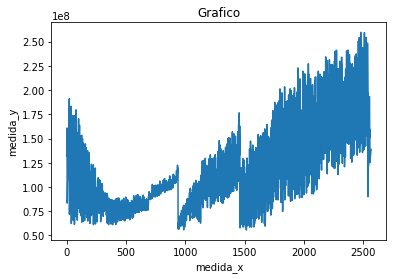

In [13]:
dibuja_linea([monitoreo_memoria_data['MemoriaUsadaJVM(bytes)']], 'Grafico')

Ajustar datos del indice

In [14]:
demanda_data['Fecha'] = demanda_data['Fecha'].str[:-3]
monitoreo_memoria_data['Fecha'] = monitoreo_memoria_data['Fecha'].str[:-3]

Agrupar datos del indice

In [15]:
demanda_data = demanda_data.groupby(['Fecha']).agg({'nro_registro':sum,'nro_actualiza':sum,'nro_consulta':sum,'nro_elimina':sum})
monitoreo_memoria_data = monitoreo_memoria_data.groupby(['Fecha']).agg({'MemoriaUsadaJVM(bytes)':max})

Ordena datos por indice

In [16]:
demanda_data = demanda_data.sort_values('Fecha')
monitoreo_memoria_data = monitoreo_memoria_data.sort_values('Fecha')

Se une la información por indices

In [17]:
consolidado_data=demanda_data.join(monitoreo_memoria_data,how='inner')

Procesamiento adicional de datos

In [18]:
#Aquí puede agregar setencias adicionales de preprocesamiento de datos

Se extran los valores de X y Y

In [19]:
X=consolidado_data.loc[:,['nro_registro','nro_actualiza','nro_consulta','nro_elimina']]

Se normalizan los valores de X entre 0 y 1

In [20]:
normalizar_por_mayor(X)

Se normalizó la columna nro_elimina dividiendo para 53.0


## 4. Analisis de datos preparados

In [21]:
demanda_data.head(5)

,nro_registro,nro_actualiza,nro_consulta,nro_elimina
Fecha,,,,
2020-08-02 23:39,25,0,0,0
2020-08-02 23:40,30,15,30,35
2020-08-02 23:41,45,35,70,15
2020-08-02 23:42,62,46,84,35
2020-08-02 23:43,83,49,51,5


In [22]:
demanda_data.describe()

,nro_registro,nro_actualiza,nro_consulta,nro_elimina
count,427.000000,427.000000,427.000000,427.000000
mean,135.807963,40.871194,49.819672,24.215457
std,69.973507,17.928910,20.206162,11.730561
min,0.000000,0.000000,0.000000,0.000000
25%,79.000000,27.000000,35.000000,15.000000
50%,136.000000,40.000000,50.000000,25.000000
75%,190.500000,54.000000,65.000000,31.000000
max,346.000000,95.000000,100.000000,53.000000


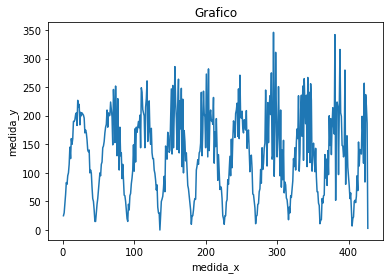

In [23]:
dibuja_linea([demanda_data['nro_registro']], 'Grafico')

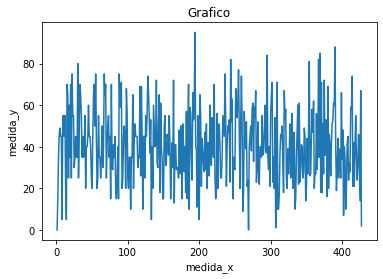

In [24]:
dibuja_linea([demanda_data['nro_actualiza']], 'Grafico')

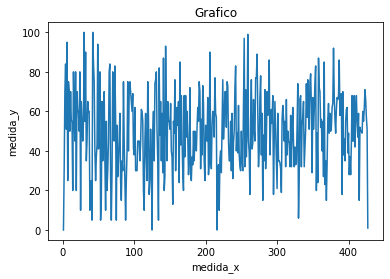

In [25]:
dibuja_linea([demanda_data['nro_consulta']], 'Grafico')

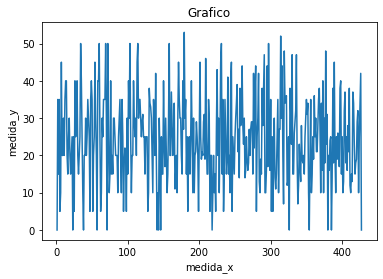

In [26]:
dibuja_linea([demanda_data['nro_elimina']], 'Grafico')

In [27]:
monitoreo_memoria_data.head(5)

,MemoriaUsadaJVM(bytes)
Fecha,
2020-08-02 23:39,160888616
2020-08-02 23:40,114742408
2020-08-02 23:41,151721552
2020-08-02 23:42,191081960
2020-08-02 23:43,112992720


In [28]:
monitoreo_memoria_data.describe()

,MemoriaUsadaJVM(bytes)
count,4.280000e+02
mean,1.448713e+08
std,5.068683e+07
min,6.714889e+07
25%,1.015274e+08
50%,1.361456e+08
75%,1.889407e+08
max,2.596699e+08


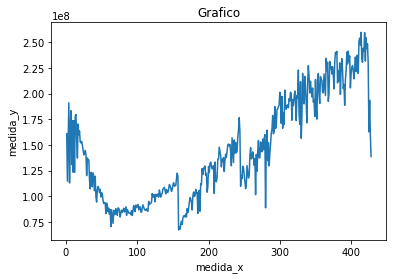

In [29]:
dibuja_linea([monitoreo_memoria_data['MemoriaUsadaJVM(bytes)']], 'Grafico')

In [30]:
consolidado_data.head(5)

,nro_registro,nro_actualiza,nro_consulta,nro_elimina,MemoriaUsadaJVM(bytes)
Fecha,,,,,
2020-08-02 23:39,25,0,0,0,160888616
2020-08-02 23:40,30,15,30,35,114742408
2020-08-02 23:41,45,35,70,15,151721552
2020-08-02 23:42,62,46,84,35,191081960
2020-08-02 23:43,83,49,51,5,112992720


In [31]:
consolidado_data.describe()

,nro_registro,nro_actualiza,nro_consulta,nro_elimina,MemoriaUsadaJVM(bytes)
count,427.000000,427.000000,427.000000,427.000000,4.270000e+02
mean,135.807963,40.871194,49.819672,24.215457,1.448857e+08
std,69.973507,17.928910,20.206162,11.730561,5.074540e+07
min,0.000000,0.000000,0.000000,0.000000,6.714889e+07
25%,79.000000,27.000000,35.000000,15.000000,1.015208e+08
50%,136.000000,40.000000,50.000000,25.000000,1.360123e+08
75%,190.500000,54.000000,65.000000,31.000000,1.889717e+08
max,346.000000,95.000000,100.000000,53.000000,2.596699e+08


## 5. Modelos de predicción

### 5.1 Metrica: MemoriaUsadaJVM(bytes)

In [32]:
y = consolidado_data['MemoriaUsadaJVM(bytes)']
#se sugiere descomentar la siguiente linea para convertir bytes a MB
#mejora la capacidad de predicción con números más pequeños
y=y/(1024*1024)

Se separa datos de entrenamiento y pruebas

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [34]:
resultados=list()

In [35]:
algoritmos=list()

**Modelo de regresión lineal**

In [36]:
lReg = LinearRegression().fit(X_train, y_train)
y_pred=lReg.predict(X_test)
resultados.append(y_pred)
algoritmos.append('Regresion Lineal')

**Modelo Random Forest**

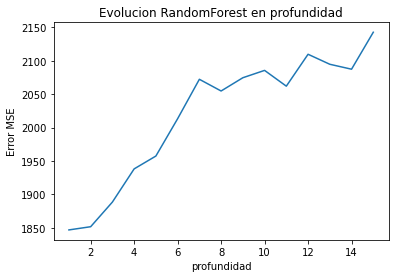

In [37]:
rFor = RandomForestRegressor(criterion='mse', max_depth=2,random_state=1234,n_estimators=50)
rFor = rFor.fit(X_train,y_train)
y_pred = rFor.predict(X_test)
resultados.append(y_pred)
algoritmos.append('Random Forest')

evolucion_random_forest(15, 50, X_train, y_train, X_test, y_test)

**Modelo Support Vector Machine (Regression)**

In [38]:
regr = SVR(kernel='rbf', C=0.8, gamma='scale', epsilon=0.1)
regr.fit(X, y)
y_pred=regr.predict(X_test)
resultados.append(y_pred)
algoritmos.append('Maquinas de Vector de Soporte')

**Modelo Red Neuronal**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
46/46 [==============================] - 1s 15ms/step - loss: 21143.9785 - mse: 21143.9785 - val_loss: 22027.4941 - val_mse: 22027.4941
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 20988.9277 - mse: 20988.9277 - val_loss: 21804.1875 - val_mse: 21804.1875
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 20668.5000 - mse: 20668

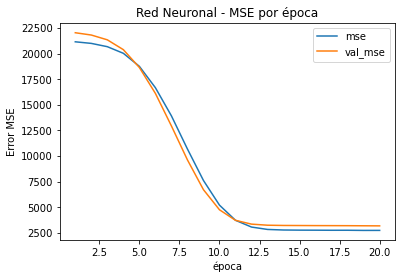

In [39]:
modelo = Sequential()
modelo.add(Dense(12, kernel_initializer='glorot_uniform', activation='relu', input_shape=(4,)))
modelo.add(Dense(12, kernel_initializer='glorot_uniform', activation='relu'))
modelo.add(Dense(1))

modelo.compile(loss='mse', optimizer=Adam(), metrics=['mse'])
modelo.summary()
historial=modelo.fit(X_train, y_train, epochs=20, batch_size=6, verbose=1, validation_split=0.2)

y_pred=modelo.predict(X_test)
resultados.append(y_pred)
algoritmos.append('Red Neuronal')

dibuja_linea([historial.history['mse'],historial.history['val_mse']], 'Red Neuronal - MSE por época', etiqueta_x='época', etiqueta_y='Error MSE', leyendas=['mse', 'val_mse'])

In [40]:
df=evalua(y_test, resultados, algoritmos)
display(df)

,Regresion Lineal,Random Forest,Maquinas de Vector de Soporte,Red Neuronal
metrica,,,,
Error Cuadratico Medio (MSE),1888.393406,1851.722537,1976.689308,2339.622119
Raiz MSE,43.455649,43.031646,44.459974,48.369640
Error Absoluto Medio (MAE),36.597480,36.171572,35.853317,39.309703
